# LOAD DATASET

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DATA PREPROCESSING

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

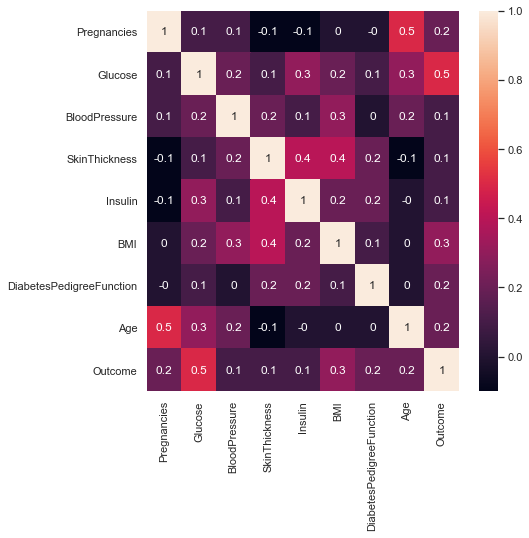

In [5]:
sns.set(rc={'figure.figsize':(7,7)})
corr_mat=df.corr().round(1)
sns.heatmap(corr_mat,annot=True)

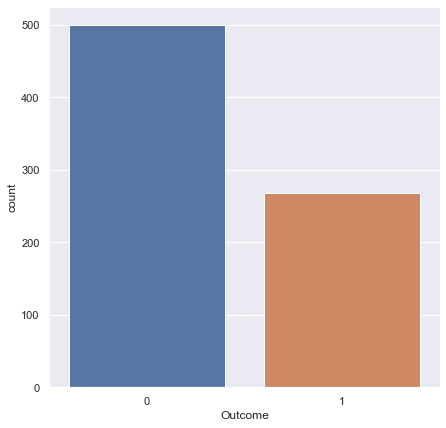

In [6]:
#sns.set(style="darkgrid")
#df = sns.load_dataset('df')
ax = sns.countplot(x="Outcome", data=df)

We notice from this that the dataset is highly skewed.

# Dividing dataset into Feature and Target

In [7]:
X=df.iloc[:,0:7]
y=df.loc[:,'Outcome']

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# FEATURE SELECTION

### Using SelectKBest
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

https://stackoverflow.com/questions/41944341/scikit-learn-compute-plot-recursive-kbest-features-k-all-performance <br>
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py <br>https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

## ANOVA

In [10]:


from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif


In [11]:
skb=SelectKBest(f_classif,k='all')
X_new=skb.fit(X,y)
X_new

SelectKBest(k='all')

In [12]:
X_new.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ])

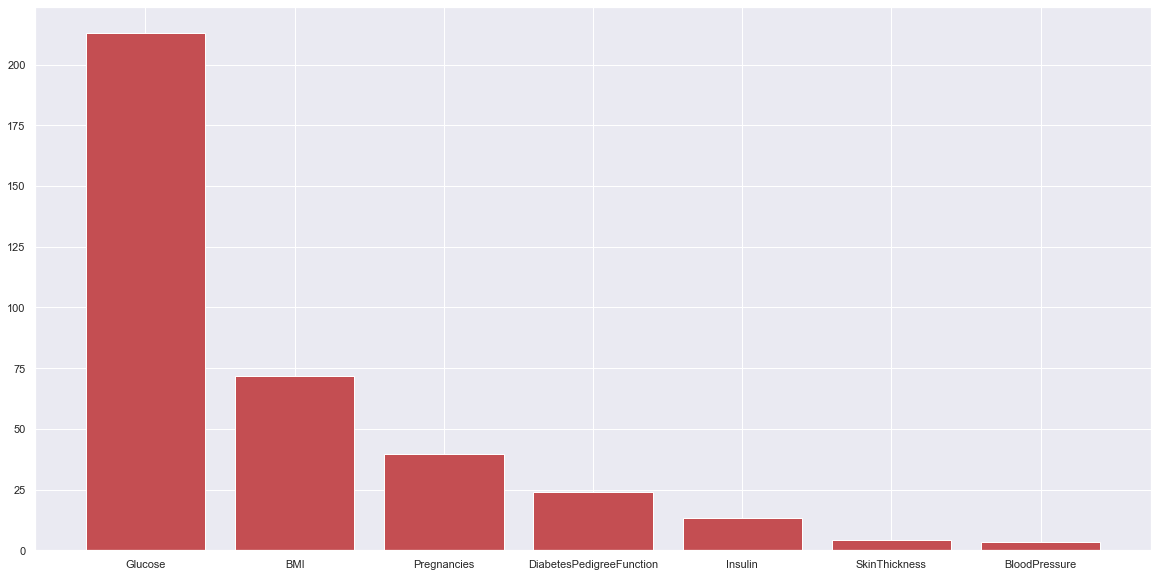

In [13]:
indices = np.argsort(X_new.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(7):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(20,10))
plt.bar(features, X_new.scores_[indices[range(7)]], color='r', align='center')
plt.show()

## MIC

In [14]:
skb=SelectKBest(mutual_info_classif,k='all')
X_new=skb.fit(X,y)
X_new

SelectKBest(k='all', score_func=<function mutual_info_classif at 0x12AD2660>)

In [15]:
X_new.scores_


array([0.01163132, 0.11599885, 0.        , 0.        , 0.03680008,
       0.07637097, 0.01185308])

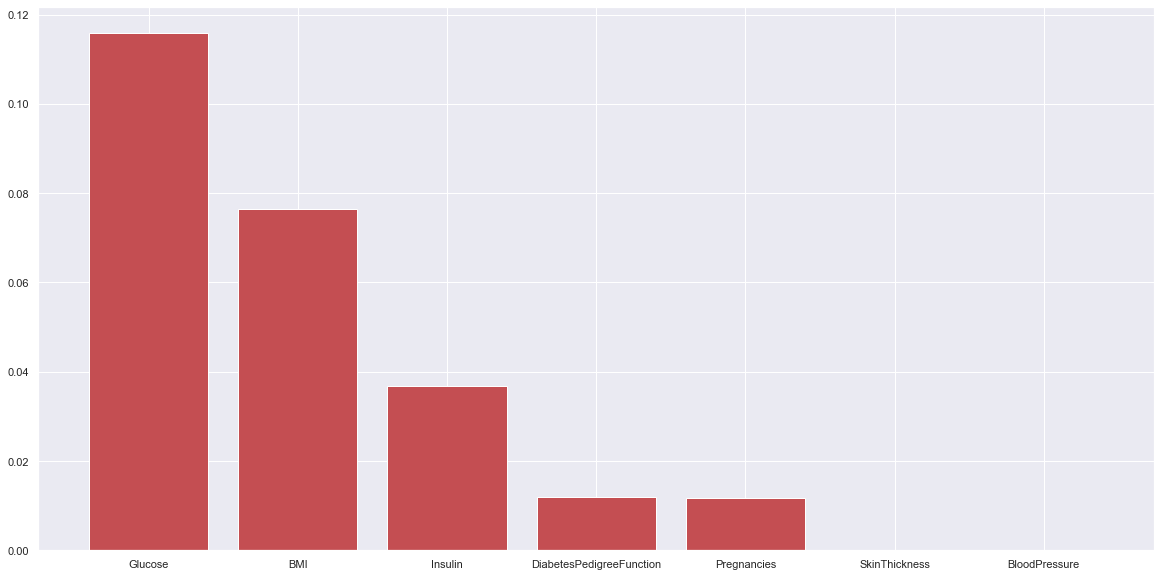

In [16]:
indices = np.argsort(X_new.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(7):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(20,10))
plt.bar(features, X_new.scores_[indices[range(7)]], color='r', align='center')
plt.show()

### CHI2 TEST

In [17]:
skb=SelectKBest(chi2,k='all')
X_new=skb.fit(X,y)
X_new

SelectKBest(k='all', score_func=<function chi2 at 0x124D7858>)

In [18]:
X_new.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155])

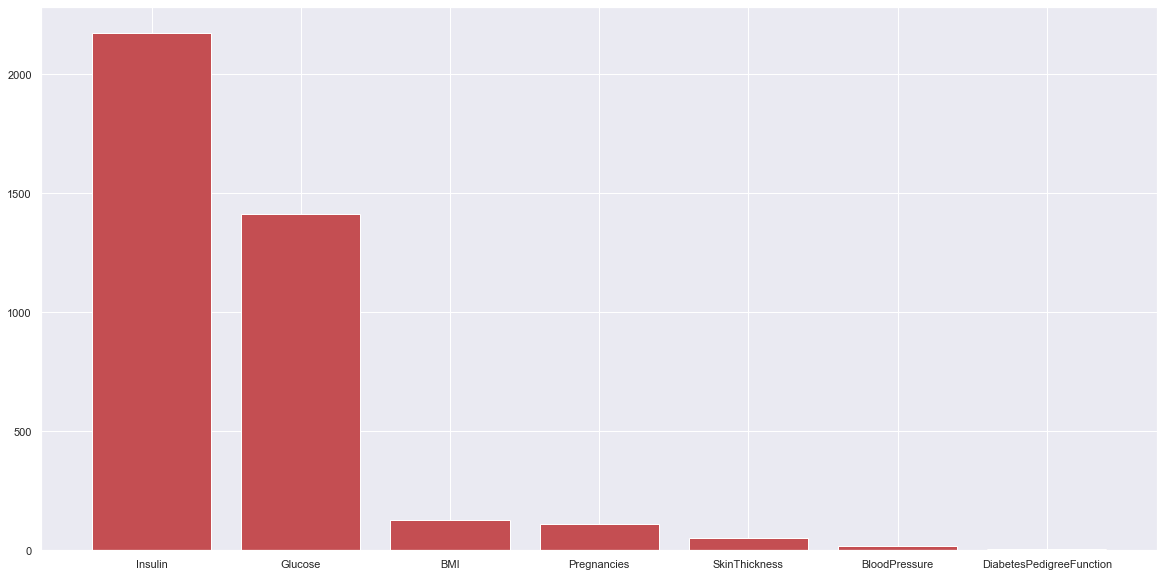

In [25]:
indices = np.argsort(X_new.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(7):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(20,10))
plt.bar(features, X_new.scores_[indices[range(7)]], color='r', align='center')
plt.show()

Since the paper uses Chi2 test as a metric for determining the relative importance of feaure variables, we stick to this. However to select the value for the number of features which yields optimum result, we will resort to RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION

### RFECV
sklearn.feature_selection.RFECV(estimator, step=1, min_features_to_select=1, cv=None, scoring=None, verbose=0, n_jobs=None)<br>
We use SVM Linear as the estimator, CV can be K-Fold or StratifiedKFold Cross Validation, scoring can be accuracy....

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Optimal number of features : 7


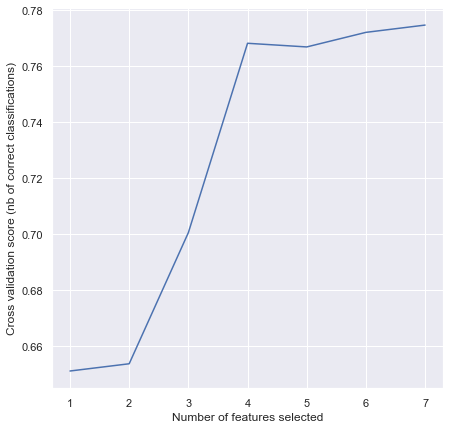

In [23]:
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [20]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [21]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1])

We note that the accuracy is significantly high at n=4 and then it increases only slightly at n=7. So we stick with 7 features.

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
603,7,150,78,29,126,35.2,0.692
118,4,97,60,23,0,28.2,0.443
247,0,165,90,33,680,52.3,0.427
157,1,109,56,21,135,25.2,0.833
468,8,120,0,0,0,30.0,0.183
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
192,7,159,66,0,0,30.4,0.383
629,4,94,65,22,0,24.7,0.148
559,11,85,74,0,0,30.1,0.300


# MODEL TRAINING using SVM

In [135]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [136]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}

In [138]:
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('SupVM', SVC())]),
             param_grid={'SupVM__C': [0.1, 0.3, 1, 3, 10],
                         'SupVM__gamma': [0.1, 0.3, 1, 3, 10],
                         'pca__n_components': [2, 3, 4]},
             scoring='f1')

In [140]:
print(model.score(X,y))

0.6805845511482255


In [141]:
model.best_params_

{'SupVM__C': 3, 'SupVM__gamma': 0.3, 'pca__n_components': 4}

# MODEL TRAINING using LR

In [143]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X, y)
#y_pred = classifier.predict(X_test)
#y_pred

In [144]:
classifier.score(X,y)

0.635593220338983

# UNDERSAMPLING

We try out various undersampling technqiues to address the class imbalance and then perform the union and intersection operations on them.

## Methods that Select Examples to Keep
1.Near Miss Undersampling<br>
2.Condensed Nearest Neighbor Rule for Undersampling <br><br>

## Methods that Select Examples to Delete
1.Tomek Links for Undersampling<br>
2.Edited Nearest Neighbors Rule for Undersampling<br><br>

## Combinations of Keep and Delete Methods
1.One-Sided Selection for Undersampling<br>
2.Neighborhood Cleaning Rule for Undersampling

In [38]:
from imblearn.under_sampling import (RandomUnderSampler, ClusterCentroids, TomekLinks, NeighbourhoodCleaningRule, NearMiss)
from collections import Counter


### RANDOM UNDER SAMPLER

In [39]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [40]:
X_rus

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,97,70,40,0,38.1,0.218
1,5,78,48,0,0,33.7,0.654
2,3,111,58,31,44,29.5,0.430
3,2,129,84,0,0,28.0,0.284
4,7,102,74,40,105,37.2,0.204
...,...,...,...,...,...,...,...
531,1,128,88,39,110,36.5,1.057
532,0,123,72,0,0,36.3,0.258
533,6,190,92,0,0,35.5,0.278
534,9,170,74,31,0,44.0,0.403


In [41]:
y_rus

0      0
1      0
2      0
3      0
4      0
      ..
531    1
532    1
533    1
534    1
535    1
Name: Outcome, Length: 536, dtype: int64

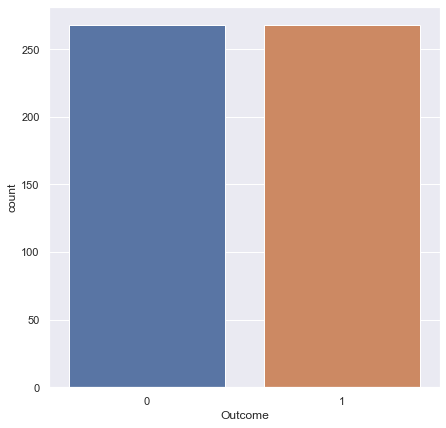

In [42]:
sns.countplot(y_rus)

In [43]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear').fit(X_rus, y_rus)
classifier.score(X_rus,y_rus)

0.7667910447761194

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus,test_size=0.2,random_state=0)
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('SupVM', SVC())]),
             param_grid={'SupVM__C': [0.1, 0.3, 1, 3, 10],
                         'SupVM__gamma': [0.1, 0.3, 1, 3, 10],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy')

In [45]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.6759259259259259


### NEAR MISS


#### Near Miss 1
NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. <br>
The type of near-miss strategy used is defined by the “version” argument, which by default is set to 1 for NearMiss-1.

In [46]:
sampler = NearMiss(version=1)
X_nm, y_nm = sampler.fit_sample(X, y)

In [47]:
X_nm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,5,128,80,0,0,34.6,0.144
1,3,125,58,0,0,31.6,0.151
2,5,147,78,0,0,33.7,0.218
3,13,106,70,0,0,34.2,0.251
4,4,114,64,0,0,28.9,0.126
...,...,...,...,...,...,...,...
531,1,128,88,39,110,36.5,1.057
532,0,123,72,0,0,36.3,0.258
533,6,190,92,0,0,35.5,0.278
534,9,170,74,31,0,44.0,0.403


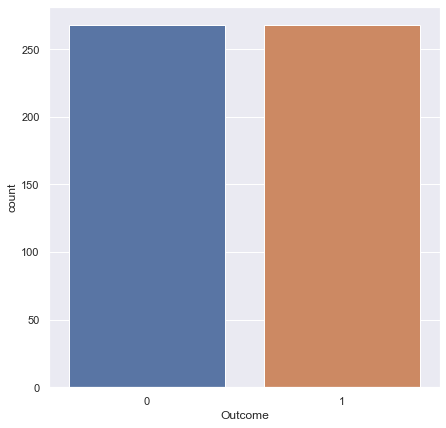

In [48]:
sns.countplot(y_nm)

#### Near Miss 2
NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. 

In [49]:
sampler = NearMiss(version=2)
X_nm2, y_nm2 = sampler.fit_sample(X, y)

In [50]:
X_nm2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0,114,80,34,285,44.2,0.167
1,0,134,58,20,291,26.4,0.352
2,2,108,62,10,278,25.3,0.881
3,2,127,58,24,275,27.7,1.600
4,4,154,62,31,284,32.8,0.237
...,...,...,...,...,...,...,...
531,1,128,88,39,110,36.5,1.057
532,0,123,72,0,0,36.3,0.258
533,6,190,92,0,0,35.5,0.278
534,9,170,74,31,0,44.0,0.403


#### Near Miss 3
NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

In [51]:
sampler = NearMiss(version=3)
X_nm3, y_nm3 = sampler.fit_sample(X, y)

C:\Users\SOHAM\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


In [52]:
X_nm3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,4,197,70,39,744,36.7,2.329
1,0,165,90,33,680,52.3,0.427
2,1,0,48,20,0,24.7,0.140
3,9,124,70,33,402,35.4,0.282
4,1,0,74,20,23,27.7,0.299
...,...,...,...,...,...,...,...
529,1,128,88,39,110,36.5,1.057
530,0,123,72,0,0,36.3,0.258
531,6,190,92,0,0,35.5,0.278
532,9,170,74,31,0,44.0,0.403


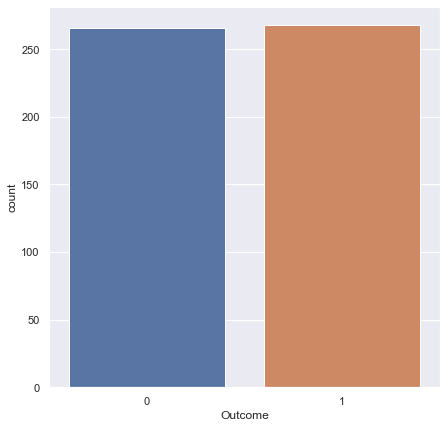

In [53]:
sns.countplot(y_nm3)

In [54]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear').fit(X_nm3, y_nm3)
classifier.score(X_nm3,y_nm3)

0.700374531835206

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_nm3,y_nm3,test_size=0.2,random_state=0)
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('SupVM', SVC())]),
             param_grid={'SupVM__C': [0.1, 0.3, 1, 3, 10],
                         'SupVM__gamma': [0.1, 0.3, 1, 3, 10],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy')

In [57]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.6448598130841121


https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/<br>
https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

### CONDENSED NEAREST NEIGHBOUR

In [58]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(n_neighbors=1)
X_cnn,y_cnn= cnn.fit_resample(X, y)
counter=Counter(y_cnn)
counter

Counter({0: 188, 1: 268})

In [59]:
X_cnn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,97,66,15,140,23.2,0.487
1,1,85,66,29,0,26.6,0.351
2,5,116,74,0,0,25.6,0.201
3,10,115,0,0,0,35.3,0.134
4,4,110,92,0,0,37.6,0.191
...,...,...,...,...,...,...,...
451,1,128,88,39,110,36.5,1.057
452,0,123,72,0,0,36.3,0.258
453,6,190,92,0,0,35.5,0.278
454,9,170,74,31,0,44.0,0.403


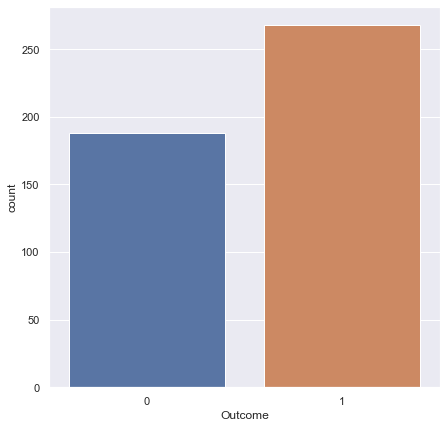

In [60]:
sns.countplot(y_cnn)

## Methods that Select Examples to Delete

### TOMEK LINKS

In [61]:
t1=TomekLinks()
X_t1, y_t1 = t1.fit_resample(X, y)

In [62]:
counter=Counter(y_t1)
counter

Counter({1: 268, 0: 440})

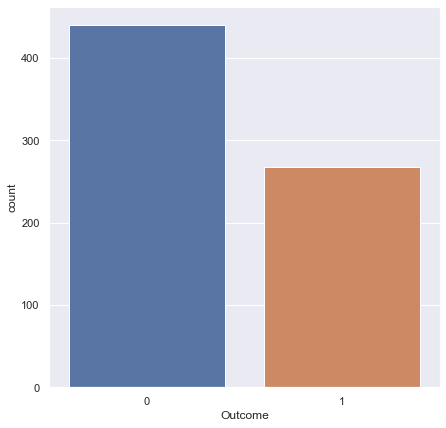

In [63]:
sns.countplot(y_t1)

### EDITED NEAREST NEIGHBOUR

In [64]:
from imblearn.under_sampling import EditedNearestNeighbours
enn=EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
counter=Counter(y_enn)
counter

Counter({0: 235, 1: 268})

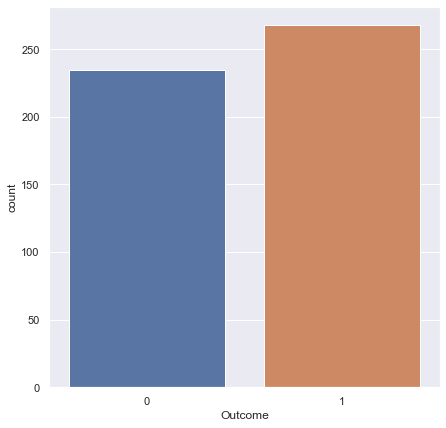

In [65]:
sns.countplot(y_enn)

In [66]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear').fit(X_enn, y_enn)
classifier.score(X_enn,y_enn)

0.8588469184890656

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_enn,y_enn,test_size=0.2,random_state=0)
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('SupVM', SVC())]),
             param_grid={'SupVM__C': [0.1, 0.3, 1, 3, 10],
                         'SupVM__gamma': [0.1, 0.3, 1, 3, 10],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy')

In [68]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8316831683168316


## Combinations of Keep and Delete Methods

### ONE-SIDED SELECTION 

One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.<br><br>

Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

In [69]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X_oss, y_oss = oss.fit_resample(X, y)
counter=Counter(y_oss)
counter

Counter({0: 416, 1: 268})

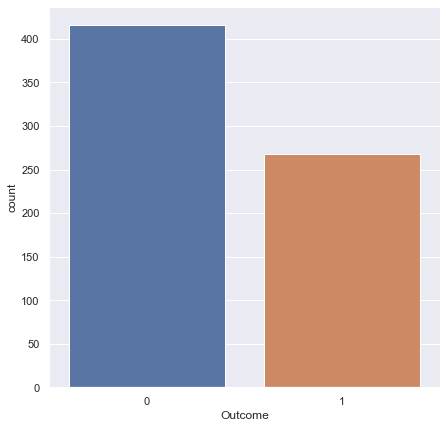

In [70]:
sns.countplot(y_oss)

### NEIGHBOURHOOD CLEANING 
The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

In [71]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 
ncr = NeighbourhoodCleaningRule()
X_ncr, y_ncr = ncr.fit_resample(X, y)
counter=Counter(y_ncr)
counter

Counter({1: 268, 0: 251})

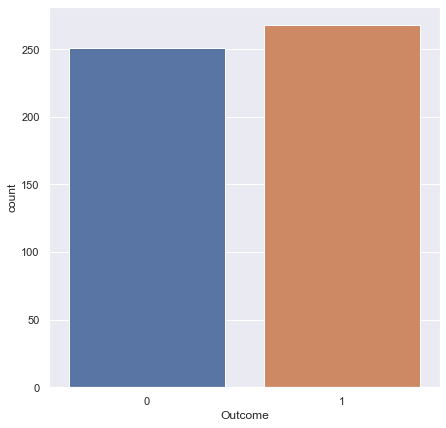

In [72]:
sns.countplot(y_ncr)

In [73]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear').fit(X_ncr, y_ncr)
classifier.score(X_ncr,y_ncr)

0.8439306358381503

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ncr,y_ncr,test_size=0.2,random_state=0)
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('SupVM', SVC())]),
             param_grid={'SupVM__C': [0.1, 0.3, 1, 3, 10],
                         'SupVM__gamma': [0.1, 0.3, 1, 3, 10],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy')

In [75]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7884615384615384


# OBSERAVTIONS
1. We notice that Tomek Links and CNN havent been effective in dealing with the  imbalance. So in our further analysis we will forego these datasets.<br>
2. We will use Near miss 3 in our further analysis. <br>
3. We will also avoid using RUS henceforth.

# UNION AND INTERSECTION 

### 1. NM ^ ENN

In [82]:
nm_enn_I=nm_df.merge(enn_df)
nm_enn_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,2,127,58,24,275,27.7,1.600,0
1,0,78,88,29,40,36.9,0.434,0
2,0,117,80,31,53,45.2,0.089,0
3,9,134,74,33,60,25.9,0.460,0
4,1,136,74,50,204,37.4,0.399,0
...,...,...,...,...,...,...,...,...
305,1,128,88,39,110,36.5,1.057,1
306,0,123,72,0,0,36.3,0.258,1
307,6,190,92,0,0,35.5,0.278,1
308,9,170,74,31,0,44.0,0.403,1


In [86]:
X_nm_enn_I=nm_enn_I.iloc[:,0:7]
y_nm_enn_I=nm_enn_I.loc[:,'Outcome']

In [88]:
from sklearn.model_selection import train_test_split
X_nm_enn_I_train,X_nm_enn_I_test,y_nm_enn_I_train,y_nm_enn_I_test=train_test_split(X_nm_enn_I,y_nm_enn_I,test_size=0.2,random_state=0)
X_nm_enn_I_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
21,0,93,60,25,92,28.7,0.532
101,6,102,82,0,0,30.8,0.180
235,8,186,90,35,225,34.5,0.423
45,3,78,50,32,88,31.0,0.248
89,1,117,88,24,145,34.5,0.403
...,...,...,...,...,...,...,...
251,4,183,0,0,0,28.4,0.212
192,0,131,66,40,0,34.3,0.196
117,8,196,76,29,280,37.5,0.605
47,8,125,96,0,0,0.0,0.232


In [89]:
pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [95]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X_nm_enn_I,y_nm_enn_I)
model.score(X_nm_enn_I,y_nm_enn_I)

0.9273356401384083

In [97]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X_nm_enn_I, y_nm_enn_I)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_nm_enn_I,y_nm_enn_I).mean()

0.9279437609841826

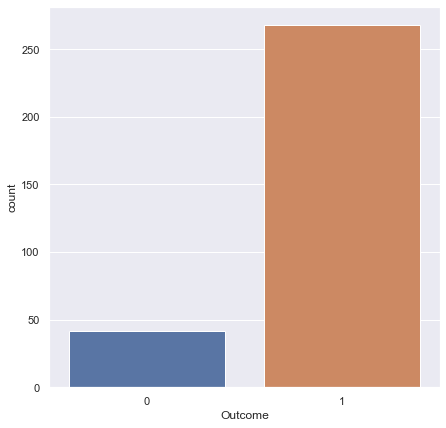

In [99]:
sns.countplot(y_nm_enn_I)

### 2. ENN ^ NCR

In [100]:
ncr_enn_I=enn_df.merge(ncr_df)
ncr_enn_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,85,66,29,0,26.6,0.351,0
1,10,139,80,0,0,27.1,1.441,0
2,5,117,92,0,0,34.1,0.337,0
3,3,88,58,11,54,24.8,0.267,0
4,4,103,60,33,192,24.0,0.966,0
...,...,...,...,...,...,...,...,...
464,1,128,88,39,110,36.5,1.057,1
465,0,123,72,0,0,36.3,0.258,1
466,6,190,92,0,0,35.5,0.278,1
467,9,170,74,31,0,44.0,0.403,1


In [101]:
X_ncr_enn_I=ncr_enn_I.iloc[:,0:7]
y_ncr_enn_I=ncr_enn_I.loc[:,'Outcome']

In [102]:
from sklearn.model_selection import train_test_split
X_ncr_enn_I_train,X_ncr_enn_I_test,y_ncr_enn_I_train,y_ncr_enn_I_test=train_test_split(X_ncr_enn_I,y_ncr_enn_I,test_size=0.2,random_state=0)
X_ncr_enn_I_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
102,2,94,68,18,76,26.0,0.561
55,3,74,68,28,45,29.7,0.293
164,6,117,96,0,0,28.7,0.157
301,4,123,62,0,0,32.0,0.226
438,13,158,114,0,0,42.3,0.257
...,...,...,...,...,...,...,...
323,3,182,74,0,0,30.5,0.345
192,0,126,86,27,120,27.4,0.515
117,0,74,52,10,36,27.8,0.269
47,6,87,80,0,0,23.2,0.084


In [104]:
pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [114]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X_ncr_enn_I,y_ncr_enn_I)
model.score(X_ncr_enn_I,y_ncr_enn_I).mean()

0.8913443830570904

In [107]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X_ncr_enn_I, y_ncr_enn_I)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_ncr_enn_I,y_ncr_enn_I).mean()

0.8973384030418251

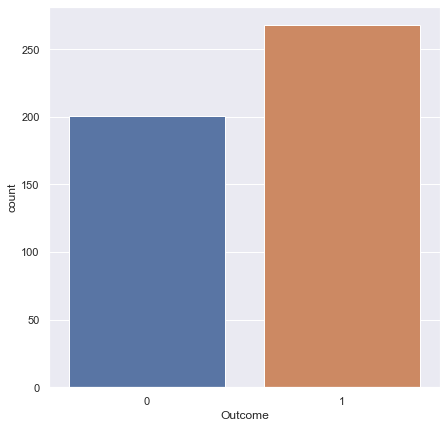

In [108]:
sns.countplot(y_ncr_enn_I)

### 3. NM ^ NCR

In [109]:
ncr_nm_I=nm_df.merge(ncr_df)
ncr_nm_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,164,82,43,67,32.8,0.341,0
1,1,136,74,50,204,37.4,0.399,0
2,13,145,82,19,110,22.2,0.245,0
3,1,100,66,29,196,32.0,0.444,0
4,0,126,84,29,215,30.7,0.520,0
...,...,...,...,...,...,...,...,...
284,1,128,88,39,110,36.5,1.057,1
285,0,123,72,0,0,36.3,0.258,1
286,6,190,92,0,0,35.5,0.278,1
287,9,170,74,31,0,44.0,0.403,1


In [110]:
X_ncr_nm_I=ncr_nm_I.iloc[:,0:7]
y_ncr_nm_I=ncr_nm_I.loc[:,'Outcome']

In [111]:
from sklearn.model_selection import train_test_split
X_ncr_nm_I_train,X_ncr_nm_I_test,y_ncr_nm_I_train,y_ncr_nm_I_test=train_test_split(X_ncr_nm_I,y_ncr_nm_I,test_size=0.2,random_state=0)
X_ncr_nm_I_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
46,8,176,90,34,300,33.7,0.467
259,7,129,68,49,125,38.5,0.439
216,6,125,76,0,0,33.8,0.121
168,5,144,82,26,285,32.0,0.452
225,11,111,84,40,0,46.8,0.925
...,...,...,...,...,...,...,...
251,10,111,70,27,0,27.5,0.141
192,0,104,64,37,64,33.6,0.510
117,12,92,62,7,258,27.6,0.926
47,7,187,68,39,304,37.7,0.254


In [112]:
pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [116]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X_ncr_nm_I,y_ncr_nm_I)
model.score(X_ncr_nm_I,y_ncr_nm_I)

0.9691470054446462

In [118]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X_ncr_nm_I, y_ncr_nm_I)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_ncr_nm_I,y_ncr_nm_I).mean()

0.9622980251346499

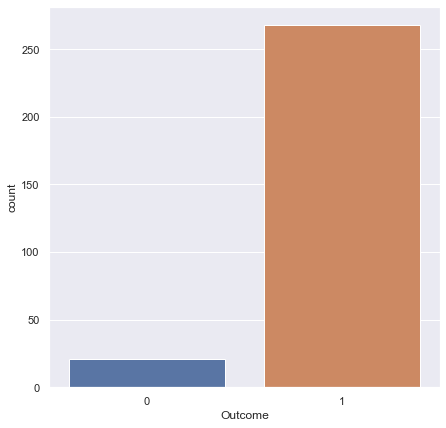

In [119]:
sns.countplot(y_ncr_nm_I)

### 4. (NM ^ ENN) U (ENN ^ NCR) U (NCR ^ NM)

In [121]:
nm_enn_ncr_U1= pd.concat([nm_enn_I, ncr_enn_I], ignore_index = True)
nm_enn_ncr_U1 =nm_enn_ncr_U1.drop_duplicates()
nm_enn_ncr_U1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,2,127,58,24,275,27.7,1.600,0
1,0,78,88,29,40,36.9,0.434,0
2,0,117,80,31,53,45.2,0.089,0
3,9,134,74,33,60,25.9,0.460,0
4,1,136,74,50,204,37.4,0.399,0
...,...,...,...,...,...,...,...,...
506,1,81,74,41,57,46.3,1.096,0
507,7,137,90,41,0,32.0,0.391,0
508,2,88,58,26,16,28.4,0.766,0
509,9,89,62,0,0,22.5,0.142,0


In [122]:
X_nm_enn_ncr_U1=nm_enn_ncr_U1.iloc[:,0:7]
y_nm_enn_ncr_U1=nm_enn_ncr_U1.loc[:,'Outcome']

In [123]:
from sklearn.model_selection import train_test_split
X_nm_enn_ncr_U1_train,X_nm_enn_ncr_U1_test,y_nm_enn_ncr_U1_train,y_nm_enn_ncr_U1_test=train_test_split(X_nm_enn_ncr_U1,y_nm_enn_ncr_U1,test_size=0.2,random_state=0)
X_nm_enn_ncr_U1_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
261,6,147,80,0,0,29.5,0.178
71,0,109,88,30,0,32.5,0.855
484,1,117,60,23,106,33.8,0.466
6,0,94,70,27,115,43.5,0.347
419,2,83,66,23,50,32.2,0.497
...,...,...,...,...,...,...,...
324,7,62,78,0,0,32.6,0.391
192,0,131,66,40,0,34.3,0.196
117,8,196,76,29,280,37.5,0.605
47,8,125,96,0,0,0.0,0.232


In [124]:
pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [125]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X_nm_enn_ncr_U1,y_nm_enn_ncr_U1)
model.score(X_nm_enn_ncr_U1,y_nm_enn_ncr_U1)

0.9009345794392523

In [126]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X_nm_enn_ncr_U1, y_nm_enn_ncr_U1)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_nm_enn_ncr_U1,y_nm_enn_ncr_U1).mean()

0.8662900188323917

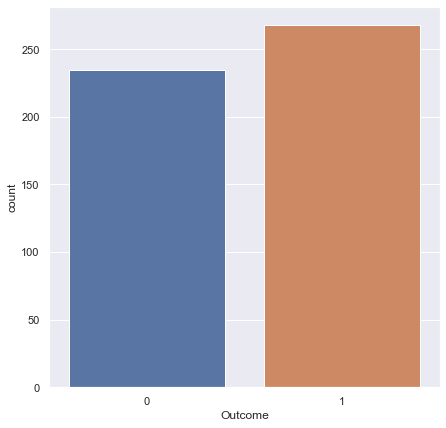

In [127]:
sns.countplot(y_nm_enn_ncr_U1)

In [129]:
nm_enn_ncr_U2=pd.concat([nm_enn_ncr_U1, ncr_nm_I], ignore_index = True)
nm_enn_ncr_U2 =nm_enn_ncr_U2.drop_duplicates()
nm_enn_ncr_U2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,2,127,58,24,275,27.7,1.600,0
1,0,78,88,29,40,36.9,0.434,0
2,0,117,80,31,53,45.2,0.089,0
3,9,134,74,33,60,25.9,0.460,0
4,1,136,74,50,204,37.4,0.399,0
...,...,...,...,...,...,...,...,...
517,2,122,70,27,0,36.8,0.340,0
518,0,125,68,0,0,24.7,0.206,0
519,4,114,65,0,0,21.9,0.432,0
520,3,130,64,0,0,23.1,0.314,0


In [130]:
X_nm_enn_ncr_U2=nm_enn_ncr_U2.iloc[:,0:7]
y_nm_enn_ncr_U2=nm_enn_ncr_U2.loc[:,'Outcome']

In [131]:
pipe_steps=[('scaler', StandardScaler()), ('pca', PCA()), ('SupVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps)

In [132]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='f1')
model.fit(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2)
model.score(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2)

0.8603773584905662

In [133]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1').fit(X_nm_enn_ncr_U2, y_nm_enn_ncr_U2)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2).mean()

0.848030018761726

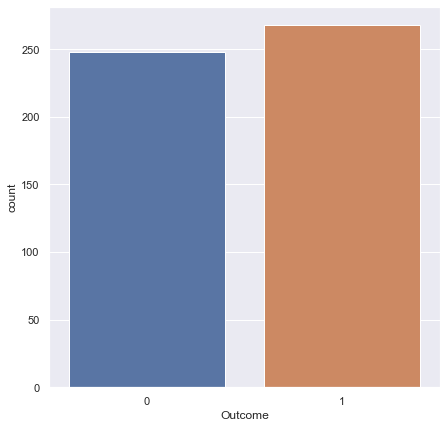

In [134]:
sns.countplot(y_nm_enn_ncr_U2)

In [145]:
check_params={'pca__n_components': [2,3,4],'SupVM__C':[0.1,0.3,1,3,10],'SupVM__gamma':[0.1,0.3,1,3,10]}
model=GridSearchCV(pipeline,param_grid=check_params,cv=5,scoring='accuracy')
model.fit(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2)
model.score(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2)

0.8565891472868217

In [146]:
from sklearn.linear_model import LogisticRegressionCV
#classifier = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
classifier = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='accuracy').fit(X_nm_enn_ncr_U2, y_nm_enn_ncr_U2)
#y_pred = classifier.predict(X_test)
#y_pred
classifier.score(X_nm_enn_ncr_U2,y_nm_enn_ncr_U2).mean()

0.8430232558139535